# SVM Implementation in Python

The dataset we will be using to implement our SVM algorithm is the Iris dataset.
first load the dataset and show 1st 5 row.

In [ ]:
import pandas as pd

df = pd.read_csv('../input/iris-data/Iris.csv')
df.head()

find the class of species from the dataset . 

In [ ]:
#eleminiting the Id column
df = df.drop(['Id'],axis=1)
#df.head()
target = df['Species']
#target.head()
s = set()
for val in target:
    s.add(val)
s = list(s)
print(s)

as there is 3 class so elemenating one to make it binary class classification problem .

In [ ]:
rows = list(range(100,150))
df = df.drop(df.index[rows])
df.head()

Take two feature such as **SepalLengthCm** and **PetalLengthCm** from four feature and draw it in graph . A linear line can be use to separate the data point in 2 class .

In [ ]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm'] #feature 1
y = df['PetalLengthCm'] #feature 2

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

preaparing the test set and training set of data . extracting the required features and split it into training and testing data. 90% of the data is used for training and the rest 10% is used for testing.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop rest of the features and extract the target values
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']

#assigning value in y according to class
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
        
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

1st initialize weight of feature 1 and 2 with zero .then compute the forward propagation . if the classification can classify accurate then use back propagation as 
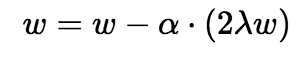
and if there is misclassification then 
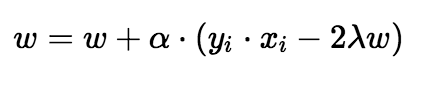
here lemda = 1/epochs

In [ ]:
## Support Vector Machine 
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

afer training , use the test set to calculate the accuracy .

In [ ]:
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions,normalize=False))


**accuracy_score :** take test set output and porediction set then calculate accuracy

return -> If normalize == True, return the fraction of correctly classified samples                              (float), else returns the number of correctly classified samples (int).

The best performance is 1 with normalize == True and the number of samples with normalize == False.

# using scikit learn library


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
#print(clf.score(x_train,y_train))